In [1]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 14

In [8]:
%%html
<style>
table {float:left}
</style>

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.datasets.base.Bunch



Load and return the boston house-prices dataset (regression).

| Description    | Value          |
|----------------|----------------|
| Samples total  | 506            |
| Dimensionality | 13             |
| Features       | real, positive |
| Targets        | real 5. - 50.  |

In [13]:
type(boston.data)

numpy.ndarray

(506L,)


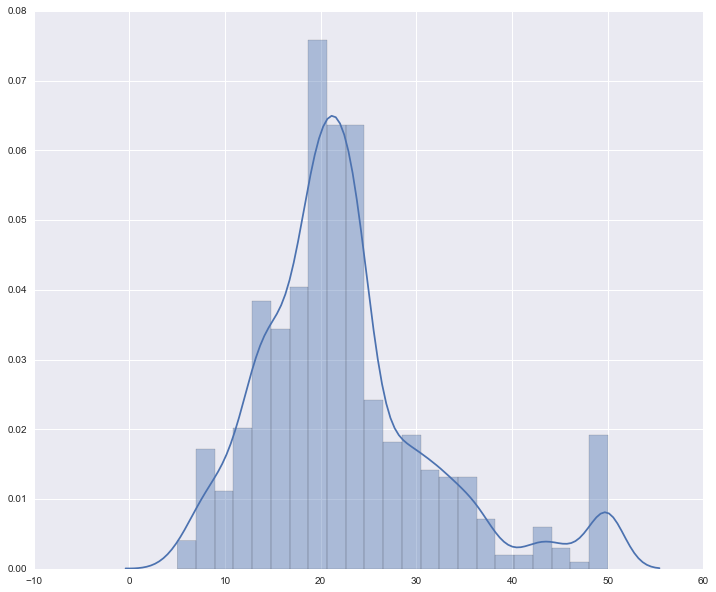

In [57]:
print boston.target.shape
plt.figure()
sns.distplot(boston.target)

Using least quare matrix method from this:
https://onlinecourses.science.psu.edu/stat501/node/382

In [22]:
# least square estimation (based on setting 1st derivation equation to zero)
# Betas = [1/(X_tr*X)]*X_tr*Y
Y = boston.target
X = boston.data
X_tr = X.transpose()
inv = np.linalg.inv(X_tr.dot(X))
b = (inv.dot(X_tr)).dot(Y)

In [25]:
y_pred = X.dot(b)

In [35]:
# Computer R Squared
ssreg = np.sum((y_pred-Y.mean())**2)
sstot = np.sum((Y-Y.mean())**2)
R_sq = ssreg/sstot
print 'R Squared  = {:.2f}'.format(R_sq)

R Squared  = 0.75


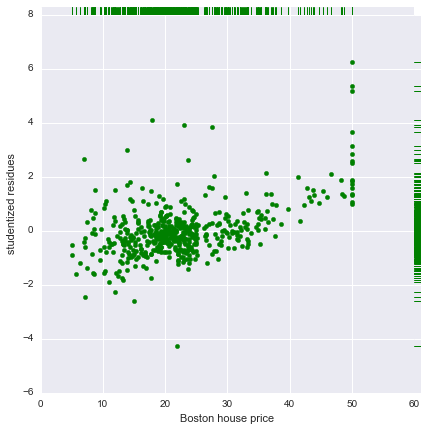

In [55]:
#standardized residual plot
res = Y-y_pred
res_d = ((1.0/(len(res)-1))*np.sum(res**2))**0.5
res_stu = res/res_d

plt.figure()
grid = sns.JointGrid(x=Y, y=res_stu, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")
grid.set_axis_labels(xlabel="Boston house price",ylabel="studentized residues")

In [47]:
res_d

4.9214055276647812

In [48]:
res_stu[0:10]

array([-1.03680849, -0.59059747,  0.70472156,  0.74969103,  1.34784177,
        0.69130444,  0.27808008,  1.62532507,  1.10028356,  0.13043357])